Link to DataWorld: https://data.world/erm3494/nutrition-physical-activity-and-obesity




Title: Analysis of Nutriton, Physical Activity, and Obesity

Author: Emily, Allie, Ailey, and Gabriella

Date: April 2025

Description: Analyzes the relationship between Nutriton, Physical Activity, and Obesity

This data was aquired from a dataset from the *U*.S. Department of Health & Human Services

In [30]:
!pip install requests pandas

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt
print ("Imported all libraries successfully...")

Imported all libraries successfully...


The dataset is loaded into a Pandas DataFrame.

In [5]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

#dataset_url = 'https://query.data.world/s/utlqjp4l6wwo2v5szswdzeozztoiyq?dws=00000'


#obesity_df = pd.read_csv('Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System (1).csv')
#obesity_df.head()

In [7]:
import pandas as pd

# Load the dataset
obesity_df = pd.read_csv('Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System (2).csv')

columns_to_keep = [
    'Race/Ethnicity',
    'LocationDesc',
    'Age(years)',
    'Education',
    'Sex',
    'Data_Value',
    'YearStart',
    'Question',
    'Data_Value_Unit'
]

filtered_df = obesity_df[columns_to_keep]
filtered_df.head()


,Race/Ethnicity,LocationDesc,Age(years),Education,Sex,Data_Value,YearStart,Question,Data_Value_Unit
0,2 or more races,Alaska,NaN,NaN,NaN,23.3,2011,Percent of adults aged 18 years and older who ...,2011.0
1,Other,Alaska,NaN,NaN,NaN,35.5,2011,Percent of adults aged 18 years and older who ...,2011.0
2,NaN,Alaska,NaN,NaN,Female,21.7,2011,Percent of adults who achieve at least 150 min...,2011.0
3,NaN,Alaska,35 - 44,NaN,NaN,29.5,2011,Percent of adults aged 18 years and older who ...,2011.0
4,NaN,Alaska,NaN,NaN,NaN,33.5,2011,Percent of adults aged 18 years and older who ...,2011.0


In [8]:
# Save the filtered data to a new CSV file
filtered_df.to_csv('cleaned_obesity_data.csv', index=False)


The dataset contains statistics on obesity of different potential factors such as amount of fruits and vegtable one eats, along with location, and physical activity.

In [9]:
#Basic Descriptive Statistics
print("Descriptive Statistics:")
print(obesity_df.describe())  # mean, std, min, 25%, 50% (median), 75%, max

Descriptive Statistics:
           YearStart        YearEnd  Data_Value_Unit    Data_Value  \
count  104272.000000  104272.000000     88872.000000  93505.000000   
mean     2017.006176    2017.006176      2016.019534     31.849359   
std         3.734882       3.734882         3.120714     10.417933   
min      2011.000000    2011.000000      2011.000000      0.900000   
25%      2014.000000    2014.000000      2013.000000     24.900000   
50%      2017.000000    2017.000000      2016.000000     31.700000   
75%      2020.000000    2020.000000      2019.000000     37.500000   
max      2023.000000    2023.000000      2021.000000     85.300000   

       Data_Value_Alt  Low_Confidence_Limit  High_Confidence_Limit   \
count    93505.000000          93505.000000            93505.000000   
mean        31.849359             27.452834               36.803022   
std         10.417933             10.204503               11.343284   
min          0.900000              0.300000                3.

The following data shows the relationship between race/ethnicity and the average percentage of responses across all health behavior questions in the dataset through a bar chart.

In [10]:
print(obesity_df.columns.tolist())


['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type', 'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ', 'Sample_Size', 'Total', 'Age(years)', 'Education', 'Sex', 'Income', 'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID', 'DataValueTypeID', 'LocationID', 'StratificationCategory1', 'Stratification1', 'StratificationCategoryId1', 'StratificationID1']


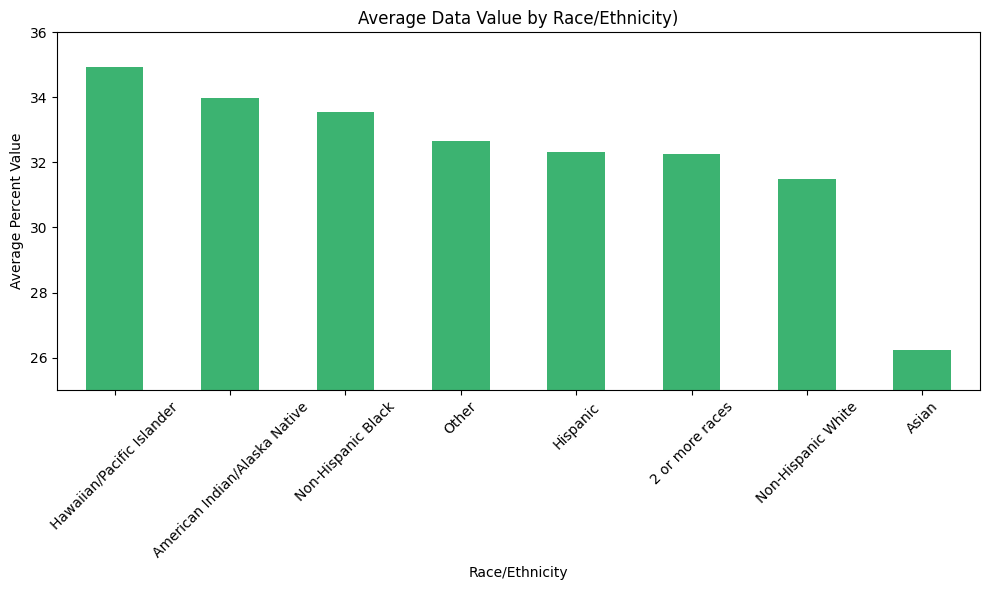

In [11]:
race_df = obesity_df[
    (obesity_df['Race/Ethnicity'].notna()) &
    (obesity_df['Data_Value'].notna())
]

# Step 2: Group by race/ethnicity and calculate average Data_Value
race_avg = race_df.groupby('Race/Ethnicity')['Data_Value'].mean().sort_values(ascending=False)

# Step 3: Plot
plt.figure(figsize=(10,6))
race_avg.plot(kind='bar', color='mediumseagreen')
plt.title("Average Data Value by Race/Ethnicity)")
plt.ylabel("Average Percent Value")
plt.xlabel("Race/Ethnicity")
plt.xticks(rotation=45)


plt.ylim(25, 36)

plt.tight_layout()
plt.show()

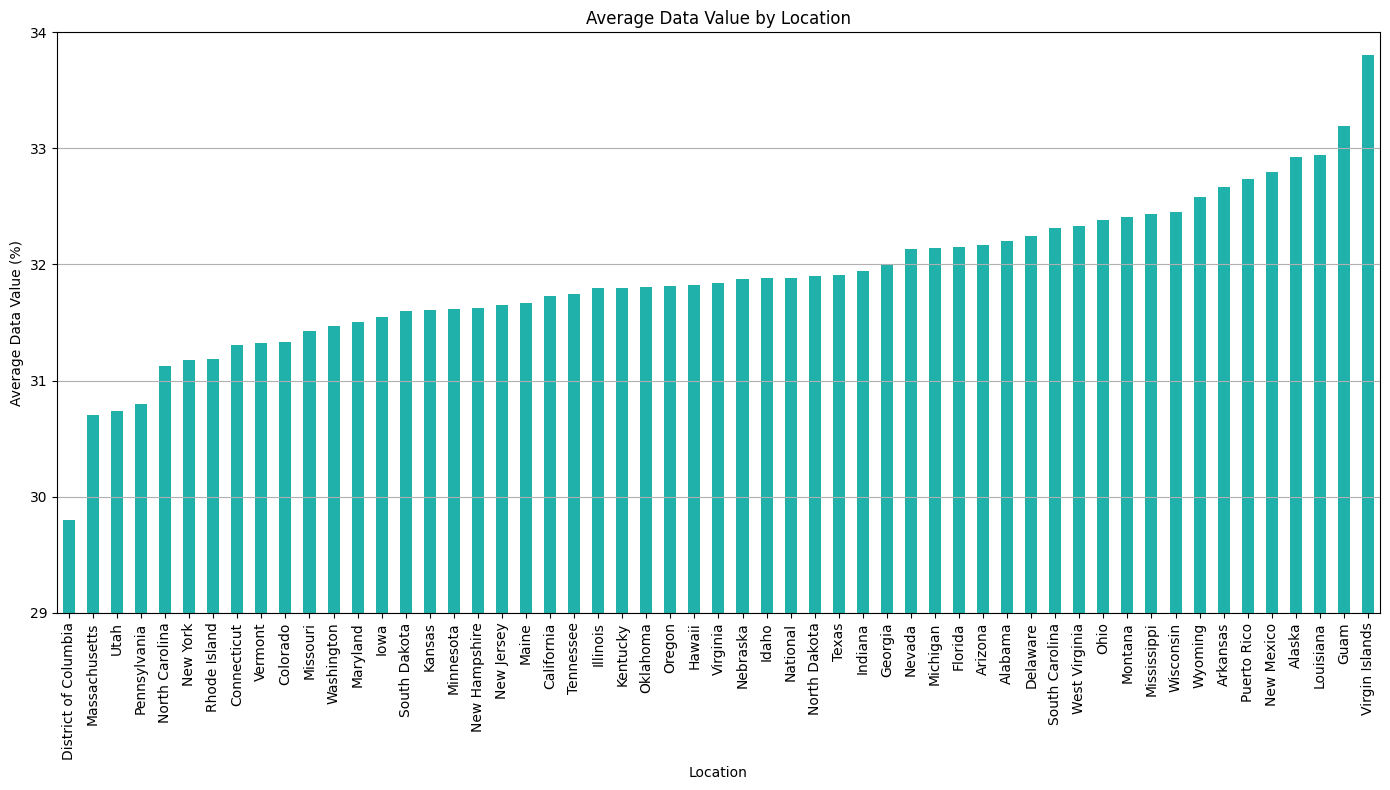

In [12]:
# Filter for valid Location and Data_Value
location_bar_df = obesity_df[
    (obesity_df['LocationDesc'].notna()) &
    (obesity_df['Data_Value'].notna())
]

# Group by Location and calculate the average Data_Value
location_avg = location_bar_df.groupby('LocationDesc')['Data_Value'].mean().sort_values()

# Plotting the bar chart
plt.figure(figsize=(14,8))
location_avg.plot(kind='bar', color='lightseagreen')
plt.title("Average Data Value by Location")
plt.xlabel("Location")
plt.ylabel("Average Data Value (%)")
plt.xticks(rotation=90)

plt.ylim(29, 34)

plt.tight_layout()
plt.grid(True, axis='y')
plt.show()





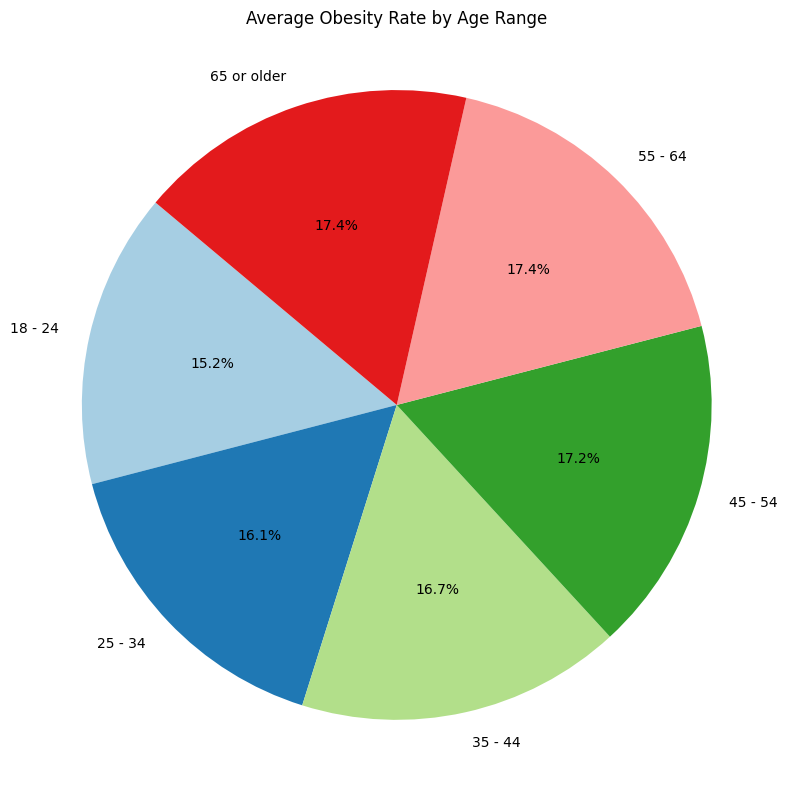

In [13]:
age_df = obesity_df[
    (obesity_df['Age(years)'].notna()) &
    (obesity_df['Data_Value'].notna())
]

avg_obesity_by_age = age_df.groupby('Age(years)')['Data_Value'].mean().sort_index()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    avg_obesity_by_age,
    labels=avg_obesity_by_age.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors)
plt.title('Average Obesity Rate by Age Range')
plt.axis('equal')
plt.tight_layout()
plt.show()

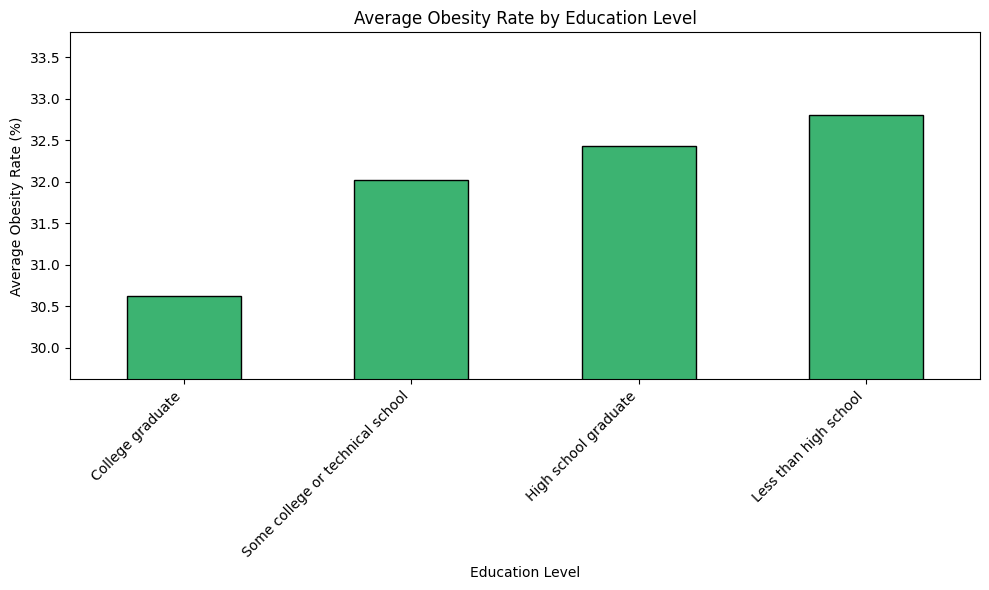

In [14]:
edu_df = obesity_df[
    (obesity_df['Education'].notna()) &
    (obesity_df['Data_Value'].notna())
]

avg_obesity_by_edu = edu_df.groupby('Education')['Data_Value'].mean().sort_values()

# Plot bar chart
plt.figure(figsize=(10, 6))
avg_obesity_by_edu.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Average Obesity Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Obesity Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.ylim(avg_obesity_by_edu.min() - 1, avg_obesity_by_edu.max() + 1)

plt.tight_layout()
plt.show()

The following data shows the relatioship between sex and obesity through a box plot.

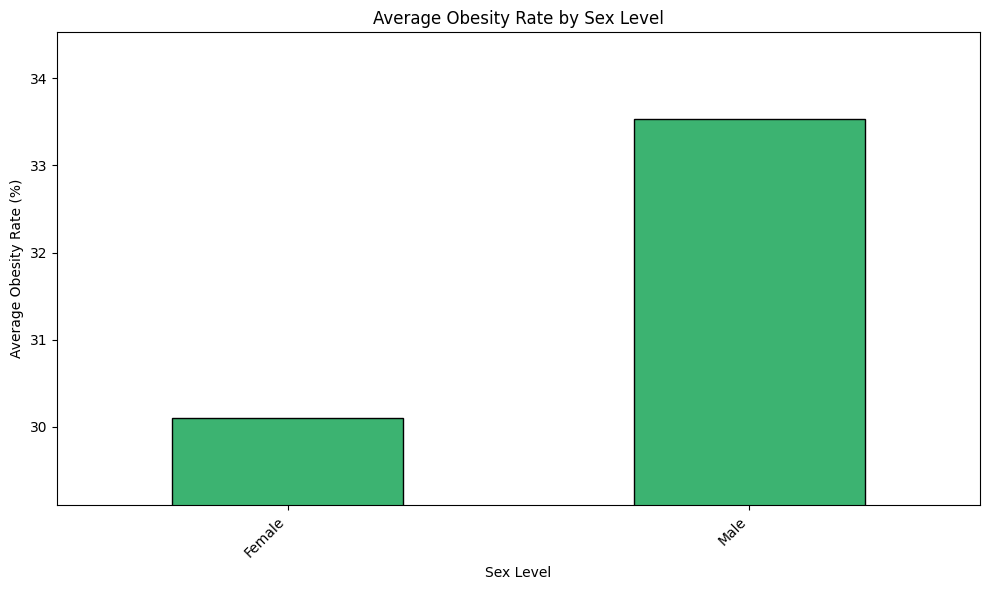

In [15]:
sex_df = obesity_df[
    (obesity_df['Sex'].notna()) &
    (obesity_df['Data_Value'].notna())
]

avg_obesity_by_sex = sex_df.groupby('Sex')['Data_Value'].mean().sort_values()

# Plot bar chart
plt.figure(figsize=(10, 6))
avg_obesity_by_sex.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Average Obesity Rate by Sex Level')
plt.xlabel('Sex Level')
plt.ylabel('Average Obesity Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.ylim(avg_obesity_by_sex.min() - 1, avg_obesity_by_sex.max() + 1)

plt.tight_layout()
plt.show()

In [31]:
import pandas as pd

# Load data
df = pd.read_csv("/content/cleaned_obesity_data.csv")

# Only drop rows where Data_Value (our outcome) is missing
df = df.dropna(subset=['Data_Value'])

# Fill missing values in predictors with 'Unknown'
for col in ['Age(years)', 'Sex', 'Education', 'Race/Ethnicity']:
    df[col] = df[col].fillna('Unknown').astype(str).str.strip()

# Create obesity label
df['Obese'] = (df['Data_Value'] > 30).astype(int)

# Check data size
print("Total rows:", len(df))
print("Obese class breakdown:\n", df['Obese'].value_counts())

Total rows: 93505
Obese class breakdown:
 Obese
1    53190
0    40315
Name: count, dtype: int64


In [32]:
df = filtered_df[['Age(years)', 'Data_Value']].dropna().copy()
df['Obese'] = (df['Data_Value'] > 30).astype(int)

# Encode Age
from sklearn.preprocessing import LabelEncoder
df['Age(years)'] = df['Age(years)'].astype(str).str.strip()
le_age = LabelEncoder()
df['Age_encoded'] = le_age.fit_transform(df['Age(years)'])

# Define features and target
X = df[['Age_encoded']]
y = df['Obese']

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (22104, 1)
y shape: (22104,)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Obese", "Obese"]))

Training samples: 17683
Testing samples: 4421
Classification Report:
              precision    recall  f1-score   support

   Not Obese       0.58      0.42      0.49      2073
       Obese       0.59      0.73      0.65      2348

    accuracy                           0.58      4421
   macro avg       0.58      0.57      0.57      4421
weighted avg       0.58      0.58      0.57      4421



In [18]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = []

fold = 1
for train_idx, test_idx in kf.split(X):
    # Split the data
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train the model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    report_text = classification_report(y_test, y_pred, target_names=["Not Obese", "Obese"])
    report_dict = classification_report(y_test, y_pred, target_names=["Not Obese", "Obese"], output_dict=True)

    # Print full report for this fold
    print(f"\n --- Fold {fold} ---")
    print(report_text)

    # Save F1 for Obese class
    f1 = report_dict['Obese']['f1-score']
    f1_scores.append(f1)

    fold += 1

# Final average
print("\n Average F1 Score (Obese) across folds:", np.mean(f1_scores))



 --- Fold 1 ---
              precision    recall  f1-score   support

   Not Obese       0.58      0.42      0.49      2073
       Obese       0.59      0.73      0.65      2348

    accuracy                           0.58      4421
   macro avg       0.58      0.57      0.57      4421
weighted avg       0.58      0.58      0.57      4421


 --- Fold 2 ---
              precision    recall  f1-score   support

   Not Obese       0.57      0.41      0.47      2017
       Obese       0.60      0.74      0.66      2404

    accuracy                           0.59      4421
   macro avg       0.58      0.57      0.57      4421
weighted avg       0.59      0.59      0.58      4421


 --- Fold 3 ---
              precision    recall  f1-score   support

   Not Obese       0.58      0.42      0.49      2050
       Obese       0.59      0.73      0.66      2371

    accuracy                           0.59      4421
   macro avg       0.59      0.58      0.57      4421
weighted avg       0.59

<Figure size 600x600 with 0 Axes>

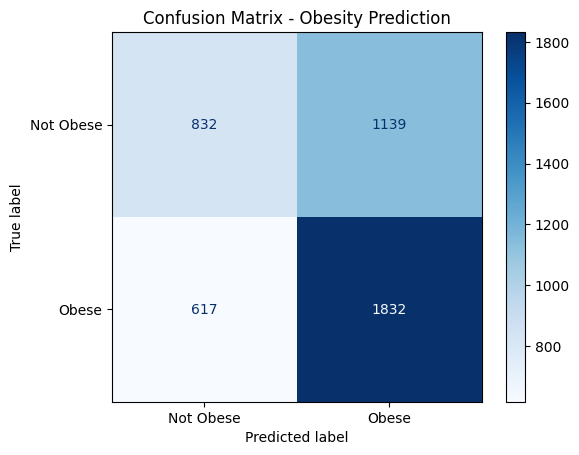

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Re-train model on full train/test split if needed
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Obese", "Obese"])

plt.figure(figsize=(6, 6))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix - Obesity Prediction")
plt.grid(False)
plt.show()


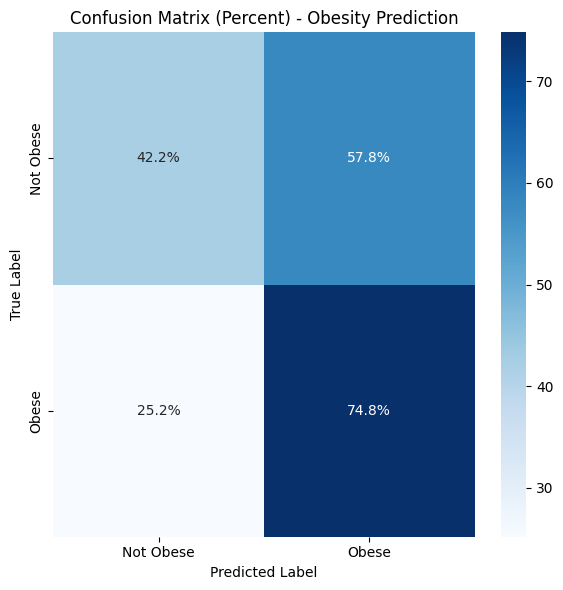

In [20]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict again (just to be sure)
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert to percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Format the annotations to include the % symbol
labels = np.array([["{:.1f}%".format(value) for value in row] for row in cm_percent])

# Plot the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm_percent, annot=labels, fmt="", cmap="Blues",
            xticklabels=["Not Obese", "Obese"],
            yticklabels=["Not Obese", "Obese"])
plt.title("Confusion Matrix (Percent) - Obesity Prediction")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

